# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import nltk
import nltk
nltk.download('brown')
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

# IMDb reviews URL
url = 'https://www.imdb.com/title/tt9362722/reviews?ref_=tt_urv'

# Function to fetch data from the URL using BeautifulSoup
def fetch_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print("Failed to fetch data from URL:", url)
        return None

# Function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    tokens = [Word(word).lemmatize() for word in tokens]
    return tokens

# Function to extract reviews from IMDb page using BeautifulSoup
def extract_reviews(url):
    html_content = fetch_data(url)
    if html_content:
        soup = BeautifulSoup(html_content, 'html.parser')
        reviews = soup.find_all("div", class_="text")
        return [review.get_text() for review in reviews]
    else:
        return None

# Fetch reviews from IMDb
reviews = extract_reviews(url)

# Create DataFrame from the collected data
df = pd.DataFrame(reviews, columns=['Review'])

# Apply text preprocessing to 'Review' column
df['Cleaned Review'] = df['Review'].apply(preprocess_text)

# Calculate N-gram frequencies
def calculate_ngram_frequencies(tokens, n):
    ngrams = list(nltk.ngrams(tokens, n))
    frequency_dist = nltk.FreqDist(ngrams)
    return frequency_dist

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(bigrams, tokens):
    bigram_probs = {}
    for bigram in bigrams:
        word1, word2 = bigram
        bigram_probs[bigram] = bigrams[bigram] / tokens.count(word1)
    return bigram_probs

# Function to extract noun phrases and calculate their relative probabilities
def extract_and_calculate_noun_phrases(text):
    blob = TextBlob(text)
    noun_phrases = blob.noun_phrases
    noun_phrase_freq = {noun_phrase: text.count(noun_phrase) for noun_phrase in noun_phrases}
    max_freq = max(noun_phrase_freq.values())
    relative_probabilities = {noun_phrase: freq / max_freq for noun_phrase, freq in noun_phrase_freq.items()}
    return relative_probabilities

# Apply functions to calculate frequencies and probabilities
df['Trigram Frequencies'] = df['Cleaned Review'].apply(lambda x: calculate_ngram_frequencies(x, 3))
df['Bigram Frequencies'] = df['Cleaned Review'].apply(lambda x: calculate_ngram_frequencies(x, 2))
df['Noun Phrase Probabilities'] = df['Review'].apply(extract_and_calculate_noun_phrases)

# Display the DataFrame
df.head(100)


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


,Review,Cleaned Review,Trigram Frequencies,Bigram Frequencies,Noun Phrase Probabilities
0,"It's honestly absurd how good the ""Spider-Vers...","[honestly, absurd, good, spiderverse, movie, a...","{('honestly', 'absurd', 'good'): 1, ('absurd',...","{('honestly', 'absurd'): 1, ('absurd', 'good')...","{'spider-verse': 0.0, 'across': 0.0, 'spider-m..."
1,"The animation, flow of everything, genius char...","[animation, flow, everything, genius, characte...","{('animation', 'flow', 'everything'): 1, ('flo...","{('animation', 'flow'): 1, ('flow', 'everythin...","{'genius character development': 1.0, 'spider-..."
2,If it wasn't already obvious in the first film...,"[wasnt, already, obvious, first, film, officia...","{('wasnt', 'already', 'obvious'): 1, ('already...","{('wasnt', 'already'): 1, ('already', 'obvious...","{'spider-verse': 0.0, 'phil': 0.0, 'chris mill..."
3,This film is a visual concert. The animation a...,"[film, visual, concert, animation, character, ...","{('film', 'visual', 'concert'): 1, ('visual', ...","{('film', 'visual'): 1, ('visual', 'concert'):...","{'visual concert': 1.0, 'character design': 1...."
4,Spider-Man: Into the Spider-Verse is probably ...,"[spiderman, spiderverse, probably, favorite, s...","{('spiderman', 'spiderverse', 'probably'): 1, ...","{('spiderman', 'spiderverse'): 1, ('spidervers...","{'spider-man': 0.0, 'spider-verse': 0.0, 'acro..."
5,"First off, you should know that this is the fi...","[first, know, first, part, one, big, movie, sp...","{('first', 'know', 'first'): 1, ('know', 'firs...","{('first', 'know'): 1, ('know', 'first'): 1, (...","{'big movie': 0.14285714285714285, 'harry pott..."
6,It's been some time since I've walked out from...,"[time, since, ive, walked, cinema, feeling, sa...","{('time', 'since', 'ive'): 1, ('since', 'ive',...","{('time', 'since'): 1, ('since', 'ive'): 1, ('...","{'cinema feeling': 1.0, 'spider-verse': 0.0, '..."
7,Let me just say that the first hour of this fi...,"[let, say, first, hour, film, hooked, knew, fi...","{('let', 'say', 'first'): 1, ('say', 'first', ...","{('let', 'say'): 1, ('say', 'first'): 1, ('fir...","{'film surpass': 1.0, ''s predecessor': 1.0, '..."
8,"I really enjoyed Into the Spider-Verse, but th...","[really, enjoyed, spiderverse, way, people, hy...","{('really', 'enjoyed', 'spiderverse'): 1, ('en...","{('really', 'enjoyed'): 1, ('enjoyed', 'spider...","{'spider-verse': 0.0, 'way people': 1.0, '2hr+..."
9,"I absolutely loved 2018's ""Into the Spider-Ver...","[absolutely, loved, 2018s, spiderverse, earned...","{('absolutely', 'loved', '2018s'): 1, ('loved'...","{('absolutely', 'loved'): 1, ('loved', '2018s'...","{'spider-verse': 0.0, 'animated picture': 0.0,..."


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import math
from collections import defaultdict

# Function to fetch data from a URL using BeautifulSoup
def fetch_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print("Failed to fetch data from URL:", url)
        return None

# IMDb reviews URL
url = 'https://www.imdb.com/title/tt9362722/reviews?ref_=tt_urv'

# Function to extract reviews from IMDb page using BeautifulSoup
def extract_reviews(url):
    html_content = fetch_data(url)
    if html_content:
        soup = BeautifulSoup(html_content, 'html.parser')
        reviews = soup.find_all("div", class_="text")
        return [review.get_text() for review in reviews]
    else:
        return None

# Fetch reviews from IMDb
reviews = extract_reviews(url)

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub('<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Preprocess reviews
preprocessed_reviews = [preprocess_text(review) for review in reviews]

# Define query
query = "An Outstanding movie with a haunting performance and best character development"
query = preprocess_text(query)

# Calculate document frequency (number of documents containing each word)
doc_freq = defaultdict(int)
for doc in preprocessed_reviews:
    for word in set(doc.split()):
        doc_freq[word] += 1

# Function to calculate TF-IDF value for a word in a document
def tf_idf_value(sentence, word, doc_freq):
    words = sentence.split()
    tf = words.count(word) / len(words)
    idf = math.log(len(doc_freq) / (1 + doc_freq[word]))
    return tf * idf

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    dot_product = sum(val1 * val2 for val1, val2 in zip(vector1, vector2))
    magnitude1 = math.sqrt(sum(val ** 2 for val in vector1))
    magnitude2 = math.sqrt(sum(val ** 2 for val in vector2))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0  # Handle division by zero
    return dot_product / (magnitude1 * magnitude2)

# Calculate TF-IDF values for the query
query_tfidf_values = {}
for word in set(query.split()):
    query_tfidf_values[word] = tf_idf_value(query, word, doc_freq)

# Convert TF-IDF values to DataFrame
query_tfidf_df = pd.DataFrame(query_tfidf_values, index=['Query']).fillna(0)

# Calculate cosine similarity scores
cosine_scores = []

# Calculate cosine similarity scores between query and documents
for i, doc in enumerate(preprocessed_reviews):
    doc_tfidf_vector = [tf_idf_value(doc, word, doc_freq) for word in query.split()]
    similarity_score = cosine_similarity(list(query_tfidf_df.iloc[0]), doc_tfidf_vector)
    cosine_scores.append((i, similarity_score))

# Sort documents based on cosine similarity scores
cosine_scores.sort(key=lambda x: x[1], reverse=True)

# Print ranked documents
print("Ranked Documents:")
for doc_index, score in cosine_scores:
    print(f"Document {doc_index + 1}: Cosine Similarity Score: {score}")


Ranked Documents:
Document 2: Cosine Similarity Score: 0.612848383023637
Document 1: Cosine Similarity Score: 0.5923338084269377
Document 6: Cosine Similarity Score: 0.591826309716401
Document 10: Cosine Similarity Score: 0.5789856740011617
Document 11: Cosine Similarity Score: 0.57443155577129
Document 4: Cosine Similarity Score: 0.572966243589233
Document 18: Cosine Similarity Score: 0.5493696794210053
Document 15: Cosine Similarity Score: 0.5322429957345539
Document 12: Cosine Similarity Score: 0.5317402390632574
Document 14: Cosine Similarity Score: 0.5256956065601393
Document 23: Cosine Similarity Score: 0.5026392426524042
Document 17: Cosine Similarity Score: 0.4826353359298152
Document 25: Cosine Similarity Score: 0.4825670079905693
Document 22: Cosine Similarity Score: 0.4792290835132137
Document 19: Cosine Similarity Score: 0.4784292959552264
Document 24: Cosine Similarity Score: 0.45541930173003775
Document 8: Cosine Similarity Score: 0.45300722679052907
Document 13: Cosine S

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
import re
import requests
from bs4 import BeautifulSoup
from gensim.models import Word2Vec

# Function to fetch data from a URL
def fetch_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print("Failed to fetch data from URL:", url)
        return None

# Sample dataset URL
url = "https://www.imdb.com/title/tt9362722/reviews?ref_=tt_urv"

# Fetching and processing data
html_content = fetch_data(url)
if html_content:
    soup = BeautifulSoup(html_content, 'html.parser')
    reviews = [review.text for review in soup.find_all("div", class_="text show-more__control")]

# Preprocess the text data
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'\s+', ' ', text)    # Remove extra whitespace
    text = text.lower()                 # Convert to lowercase
    return text

# Tokenize the text data
tokenized_reviews = [preprocess_text(review).split() for review in reviews]

# Train word2vec model with higher min_count
model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=5, workers=4)
# Get word embeddings
word_embeddings = model.wv

# Example: Get embedding for a specific word
embedding_for_movie = word_embeddings['movie']
print("Embedding for 'movie':", embedding_for_movie)



Embedding for 'movie': [ 2.48386376e-02  1.22774892e-01  6.06100215e-03  2.68025622e-02
 -1.29410597e-02 -7.22370893e-02  1.01819761e-01  2.49690875e-01
  1.37140825e-02 -5.74774332e-02  4.49180901e-02 -9.08660889e-02
 -1.19793722e-02 -5.40050045e-02 -4.93174233e-02 -1.09449700e-01
  1.00013785e-01  2.17291694e-02  3.33609618e-02 -4.92678098e-02
 -6.50960580e-02 -2.86222789e-02  7.40460008e-02  1.72003340e-02
  2.30803974e-02 -2.21459027e-02 -1.73113897e-01  3.92558351e-02
 -6.07349910e-02 -1.07190713e-01  4.09461111e-02 -2.93355226e-03
  6.10403195e-02  5.00515988e-03 -5.33190705e-02  1.07330568e-02
  4.45087664e-02 -1.18163995e-01 -2.77414080e-02  3.28790396e-02
 -4.85969707e-02 -1.61822625e-02  2.43290234e-02 -6.81325197e-02
  2.68907715e-02  7.88784325e-02  5.34172840e-02  8.42759665e-03
 -1.83218941e-02  9.13994685e-02  2.58311573e-02 -2.19729654e-02
 -1.02207111e-02  7.31006265e-02 -3.92355733e-02  1.22601055e-01
  1.16787404e-02  5.23453206e-02 -3.02855531e-03  5.72979823e-02
 -

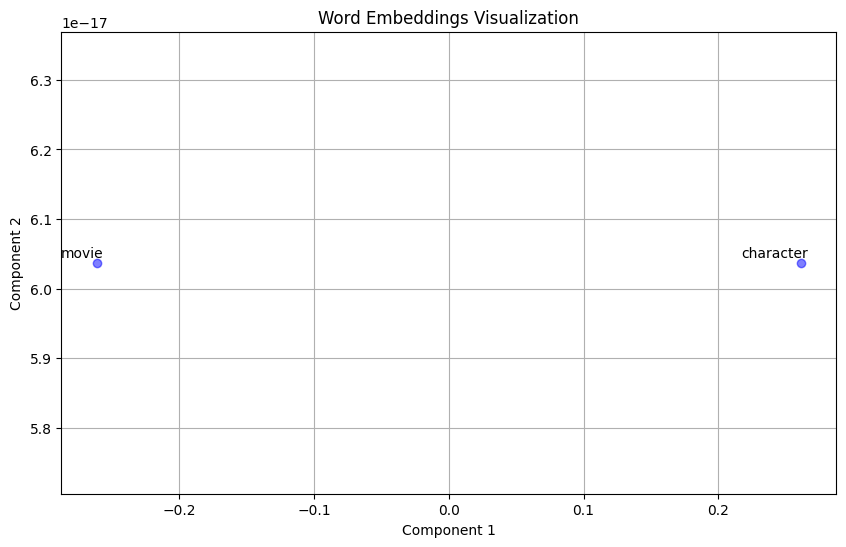

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Visualize word embeddings
def plot_embeddings(model, words):
    # Filter out words not present in the vocabulary
    words_in_vocab = [word for word in words if word in model.wv]
    word_vectors = [model.wv[word] for word in words_in_vocab]
    coordinates = PCA(n_components=2).fit_transform(word_vectors)
    plt.figure(figsize=(10, 6))
    plt.scatter(coordinates[:, 0], coordinates[:, 1], marker='o', c='blue', alpha=0.5)
    for i, word in enumerate(words_in_vocab):
        plt.annotate(word, xy=(coordinates[i, 0], coordinates[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Word Embeddings Visualization')
    plt.grid(True)
    plt.show()

# Sample words to visualize
words_to_visualize = ['movie', 'performance', 'character', 'outstanding', 'haunting']

# Plot word embeddings
plot_embeddings(model, words_to_visualize)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/Likhi97/Likhitha_Potluri_INFO5731/blob/main/movie_reviews_with_sentiment_likhitha.csv


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
# In this assignment extracting csv file with sentiment analysis is new to me. Its bit interesting and challenging to know and extract. I enjoyed the visualization part.